In [14]:
## Import Packages and CSV

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
%matplotlib inline

df = pd.read_csv('states_all.csv')

# Analyzing the Financial Investment of California's Educational Institutions in its Students

A state’s investment in education has major implications when it comes to infrastructure and the quality of its workforce. However, the distinction needs to be made between the money that goes into educational institutions and the money that schools actually spend teaching students. The latter directly affects the development of students who make the majority of California’s workforce. For this reason, I looked into: how much California’s schools spend on teaching its students; how that spending has changed over time; and how that spending compares to the instructional spending of other states. In an effort to better understand how California schools allocate their resources, I took a look into data containing information about their enrollment and finances.

In [55]:
## A Table containing values for California Only (Stored as a Variable)
CA_isolated=df.loc[lambda df: df['STATE'] == 'CALIFORNIA', :]

The financial and enrollment data was taken from the U.S. Census Bureau and National Assessment of Educational Progress NAEP). This was done using a python program that aggregated data from multiple education databases. Data pertaining to demographic information was taken from the census while financial information was taken from the NAEP. By analyzing this aggregated dataset, I was able to gather key insights into how much money California schools spent on teaching students over the past couple of decades.

## How Has The Revenue of California Schools Changed over time?

It is important that instructional spending is analyzed within the context of revenue. Revenue is directly related to the amount of money California schools are able to spend on teaching. Large changes in spending trends, may be related to drastic changes in revenue.

I plotted total revenue over time to look for any notable trends. I also did this analysis for the revenue subtotals (Federal, State, and Local Revenue).


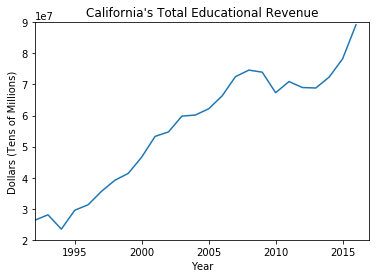

In [80]:
## Plotting California's Total Educational Revenue Over Time

plt.plot(CA_isolated['YEAR'], CA_isolated['TOTAL_REVENUE'])
plt.xlim([1992, 2017])
plt.ylim([20000000, 90000000])
plt.title('California\'s Total Educational Revenue')
plt.xlabel('Year')
plt.ylabel('Dollars (Tens of Millions)')
plt.show()

This graph shows how the total revenue of California's schools has changed over time. There is a strong upward trajectory of the revenue over 25 years. There is a noticacble dip in the revenue between 2006 and 2010. This may be related to the economic recession the United States faced at the time. 

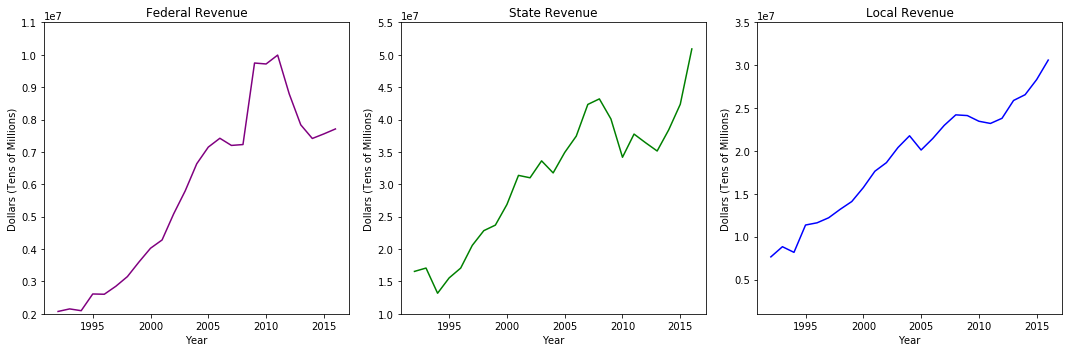

In [83]:
## Plotting California's Local State and Federal Revenue

plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
plt.plot(CA_isolated['YEAR'],CA_isolated['FEDERAL_REVENUE'], color = 'purple', label = 'line 1')
plt.title('Federal Revenue')
plt.xlabel('Year')
plt.ylabel('Dollars (Tens of Millions)')
plt.ylim([2000000,11000000])

plt.subplot(1, 3, 2)
plt.plot(CA_isolated['YEAR'],CA_isolated['STATE_REVENUE'], color = 'green', label = 'line 2')
plt.title('State Revenue')
plt.xlabel('Year')
plt.ylabel('Dollars (Tens of Millions)')
plt.ylim([10000000,55000000])

plt.subplot(1, 3, 3)
plt.plot(CA_isolated['YEAR'],CA_isolated['LOCAL_REVENUE'], color = 'blue', label = 'line 3')
plt.title('Local Revenue')
plt.xlabel('Year')
plt.ylabel('Dollars (Tens of Millions)')
plt.ylim([1000000,35000000])

plt.tight_layout()
plt.show()

These plots show the amount of revenue that the schools generated at the federal, state, and local levels. The local and state streams of revenue showed a noticeable dip around 2007. The Federal revenue actually increased signifigantly at the time. However, since state revenue makes the bulk of the the state's total revenue, California's still schools faced a net loss around 2007. 

There was an overall upward trend when it came to revenue within schools with the exception of the late 2000’s period. This dip in revenue may account for irregularities associated with instructional spending around the same time.

## How does California’s instructional spending compare to the number of students enrolled?

Instructional expenditure amounts means very little without the necessary context of how many students the money is used for. The instructional expenditure was plotted against the number of students enrolled in california schools and both of those factors were later plotted against time. 


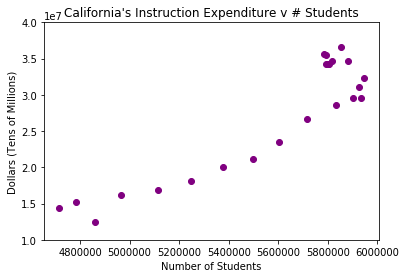

In [84]:
## Plotting California's Total Instructional Expenditure VS Number Of Students Enrolled

plt.scatter(CA_isolated['GRADES_ALL_G'],CA_isolated['INSTRUCTION_EXPENDITURE'], color= 'purple', label = 'line 1')
plt.title('California\'s Instruction Expenditure v # Students')
plt.xlabel('Number of Students')
plt.ylabel('Dollars (Tens of Millions)')
plt.ylim([10000000,40000000])

plt.show()

This scatter plot shows a positive correlation between the number of students enrolled and the amount spent on teaching. The clustering at the top right of the graph reflects increases in instructional expenditure despite the stagnation in the number of students enrolling.

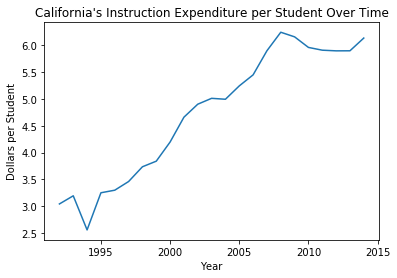

In [85]:
## Plotting California's Instruction Expenditure per Student Over Time

plt.plot(CA_isolated['YEAR'], CA_isolated['INSTRUCTION_EXPENDITURE']/CA_isolated['GRADES_ALL_G'] )
plt.title('California\'s Instruction Expenditure per Student Over Time')
plt.xlabel('Year')
plt.ylabel('Dollars per Student')
plt.show()

There was an upward trend in spending per student with the exception of around the late 2000 period which is likely related to the decrease in overall revenue at the time (as opposed to simply administrative decisions to cut back on instructional spending).

Instructional Expenditure increased consistently with revenue and with the number of students enrolled.

## How Does California’s Instructional spending per student enrolled compare to that of the rest of the country?

Would beneficial to add the context of other states’ instructional spending per student because they all share some similar sources of revenue through the federal government. Additionally, other states in the country are affected by the same federal laws. For this part of the analysis, I focused on instructional spending rates of all of the states for the year 2014. Descriptive statistics were calculated for 2014 spending data to compare California's instructional spending to the instructional spending of all of the other states. 

In [74]:
## Making variable for Instructional Expenditure Vs Students
Most_Recent = df.loc[lambda df: df['YEAR'] == 2014, :]
IExpenditure_vs_student = Most_Recent['INSTRUCTION_EXPENDITURE']/Most_Recent['GRADES_ALL_G']

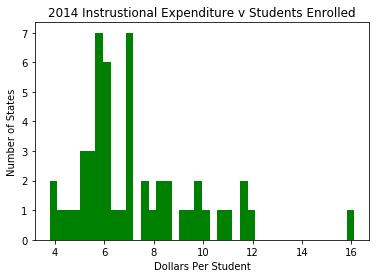

In [79]:
## A Histogram of Instructional Expenditure vs Number of Stunents Enrolled for all 50 States

plt.hist(IExpenditure_vs_student, bins=40, color='green')
plt.title('2014 Instrustional Expenditure v Students Enrolled')
plt.xlabel('Dollars Per Student')
plt.ylabel('Number of States')
plt.show()

This is a histogram containing the frequency of states that spent a certain dollar amount on instruction per student enrolled.

In [72]:
## Determining California's Instructional Expenditure v. Number of Students Enrolled for the year 2014

CA_isolated_2014=CA_isolated.loc[lambda df: df['YEAR'] == 2014, :]
CA_isolated_2014['INSTRUCTION_EXPENDITURE']/CA_isolated_2014['GRADES_ALL_G']

1131    6.133683
dtype: float64

In [70]:
## Determining mean of states' instructional expenditure per student

IExpenditure_vs_student.describe()

count    51.000000
mean      7.275034
std       2.423645
min       3.795479
25%       5.723616
50%       6.685688
75%       8.348881
max      16.113789
dtype: float64

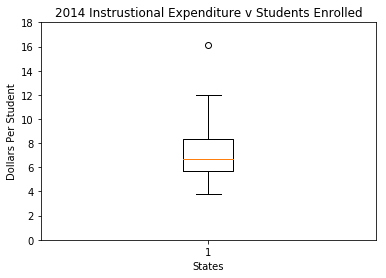

In [82]:
## Creating a Boxplot

new_IExpenditure_vs_student = IExpenditure_vs_student.dropna(axis = 0, how = 'any', inplace = False)
plt.boxplot(new_IExpenditure_vs_student)
plt.title('2014 Instrustional Expenditure v Students Enrolled')
plt.xlabel('States')
plt.ylabel('Dollars Per Student')
plt.ylim((0, 18))
plt.show()

California's mean dollars spent on instruction per student is 6.13 which falls just under the median of dollars spent on instruction per student for all of the other states. The median is a more reliable measure of central tendency in this case because of the existence of outliers that give the distribution a right skew. California does not spend significantly more or less per student on teaching than the rest of the country.

## Conclusion

This analysis has shown that California regularly increases it’s instructional spending over time and that its instructional spending keeps pace with the number of students enrolled.

## Future Direction

In this study instructional spending per student was analyzed for grades K – 12. This study didn’t include colleges since there would be different analytical implications and financial structures involved. To further this study, would be pertinent to include analysis of college revenue and expenditures. This would be best achieved by using machine learning techniques to scrape accurate data from multiple sources. Doing so would broaden the scope of the study by allowing for new insights into how instructional spending differs between primary/secondary schools and colleges; giving a full picture of instructional spending in America.